In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow_original(img):
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(show_img)

In [3]:
# Q1 : チャネルの入れ替え

# 画像を読み込み、RGBをBGRの順に入れ替えよ


In [5]:
import cv2
img = cv2.imread("assets/imori.jpg")
red = img[:, :, 2].copy()
blue = img[:, :, 0].copy()

In [6]:
img[:,:,0] = red
img[:,:,2] = blue

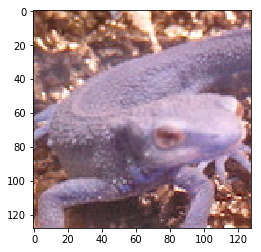

In [7]:
imshow_original(img)

In [8]:
# Q2 : グレイスケール化
# 画像をグレイスケールにせよ　Y = 0.2126 R + 0.7152 G + 0.0722 B　で計算される


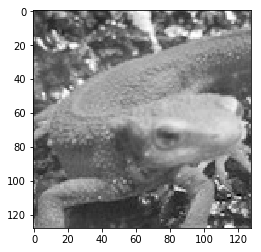

In [26]:
import cv2
import numpy as np

# 読み込み
img = cv2.imread('assets/imori.jpg').astype(np.float)

# RGB値抽出
blue  = img[:,:,0].copy()
green = img[:,:,1].copy()
red   = img[:,:,2].copy()

# gray scale計算
y = 0.2126 * red + 0.7152 * green + 0.0722 * blue
# 変換
y = y.astype(np.uint8)
imshow_original(y)

In [27]:
# Q3 : 二値化
# 画像を二値化せよ。二値化とは、画像を黒と白の二値で表現する方法である、
# ここでは、グレースケールにおいて閾値を128に設定し下式で二値化する。

# y = {0 (if y< 128)
#      255 (else)
#     }

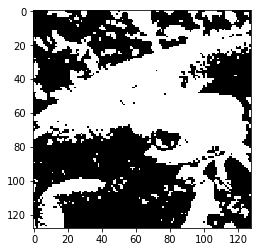

In [31]:
import cv2
import numpy as np

# 読み込み
img = cv2.imread('assets/imori.jpg').astype(np.float)

# RGB値抽出
red = img[:,:,2].copy()
green = img[:,:,1].copy()
blue = img[:,:,0].copy()

# Gray Scale化
y = 0.2126 * red + 0.7152 * green + 0.0722 * blue
y = y.astype(np.uint8)

# 二値化(Binaryzation)
y[y < 128] = 0
y[y >= 128] = 255

imshow_original(y)


In [33]:
# Q4 : 大津の二値化
# 大津の二値化を実装せよ。大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する手法である。
# これはクラス内分散とクラス間分散の比から計算される、

# ・閾値t未満をクラス0, t以上をクラス1とする。
# ・w0,w1...閾値tにより分離された各クラスの画素数の割合(w0 + w1 = 1を満たす)
# ・S0^2,S1^2...各クラスの画素値の分散
# ・M0,M1...各クラスの画素値の平均値
# とすると

# クラス内分散 Sw^2 = w0 * S0^2 + w1 * S1^2
# クラス間分散 Sb^2 = w0 * (M0 - Mt)^2 + w1 * (M1-Mt)^2 = w0 * w1 * (M0-M1)^2
# 画像全体の画素の分散 St^2 = Sw^2 + Sb^2 = (const)
# 以上より、分離度次式で定義される
# 分離度 X = Sb^2 / Sw^2 = Sb^2 / (St^2 - Sb^2)

# となるので

# argmax_{t} X = argmax_{t} Sb^2

# となる。すなわち、Sb^2 = w0 * w1 * (M0 - M1)^2が最大値となる、閾値tを二値化の閾値とすればよい


threshold >> 127


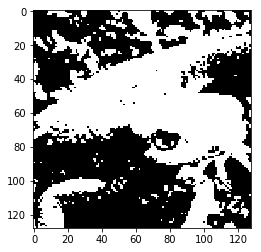

In [48]:
import cv2
import numpy as np

# 読み込み
img = cv2.imread("assets/imori.jpg").astype(np.float32)

# RBG値抽出
red = img[:,:,2].copy()
green = img[:,:,1].copy()
blue = img[:,:,0].copy()

# size抽出
H, W, C = img.shape

# Gray Scale化
y = 0.2126 * red + 0.7152 * green + 0.0722 * blue
y = y.astype(np.uint8)

# 大津の二値化(Otsu Binaryzation)
max_sigma = 0
max_t = 0

## determine threshold
for _t in range(1, 255):
    # クラス0
    v0 = out[np.where(y < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    # クラス1
    v1 = out[np.where(y >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t
## Binarization
print("threshold >>", max_t)
th = max_t
y[y < th] = 0
y[y >= th] = 255


# 出力
imshow_original(y)

In [36]:
## コード動作確認
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
a[a > 3]

array([4, 5, 6])

In [39]:
a[np.where(a > 3)] # 同じ

array([4, 5, 6])